# SESSION 6 SHP - MODELING DISTRIBUTIONS & PDF

## 1. Hubungkan Google Drive dan Google Colab

ChatGPT Prompt:

Berikan saya code python untuk mengimpor module google drive dan mount google drive saya pada google colab

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


## 2. Load Dataset

ChatGPT Prompt:

Beri kode untuk membaca dataset "KWH & Ton 2020 - 2023.xlsx" disimpan dengan nama dataframe 'data', sesuaikan path filenya

In [4]:
import pandas as pd

# Ubah path sesuai dengan lokasi file "KWH & Ton 2020 - 2023.xlsx" di Google Drive Anda
file_path = '/content/drive/MyDrive/Dataset/KWH & Ton 2020 - 2023.xlsx'

# Membaca file Excel ke dalam DataFrame
data = pd.read_excel(file_path)

# Menampilkan beberapa baris pertama dari DataFrame
data.head()


,Tahun,Bulan,KWH,Produksi (Ton)
0,2020,Jan,752180.0,1751.87332
1,2020,Feb,691252.0,1368.88293
2,2020,Mar,736908.0,1281.86890
3,2020,Apr,733527.0,1473.85584
4,2020,May,705929.0,877.20081


## 3. Modeling Distributions

## 3.1. Distribusi Eksponensial

ChatGPT Prompt:

Berikan kode python untuk mengkonstruksi distribusi eksponensial untuk kolom "KWH" pada data

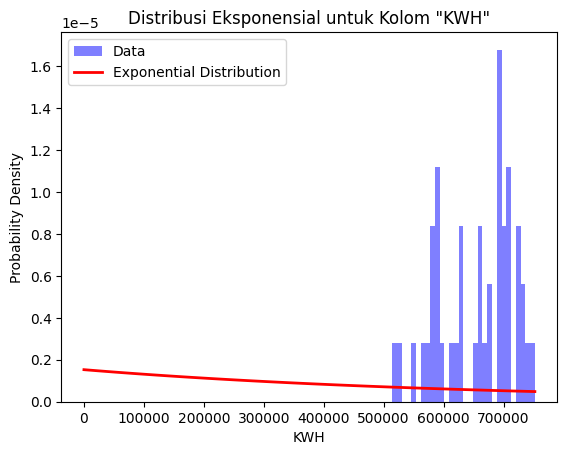

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt

# Pilih kolom "KWH" dari DataFrame
kwh_data = data['KWH']

# Estimasi parameter distribusi eksponensial (skala) dari data
scale_param = kwh_data.mean()

# Plot histogram dari data asli
plt.hist(kwh_data, bins=30, density=True, alpha=0.5, color='blue', label='Data')

# Plot PDF dari distribusi eksponensial
x = np.linspace(0, kwh_data.max(), 100)
pdf = expon.pdf(x, scale=scale_param)
plt.plot(x, pdf, 'r-', lw=2, label='Exponential Distribution')

plt.xlabel('KWH')
plt.ylabel('Probability Density')
plt.legend()
plt.title('Distribusi Eksponensial untuk Kolom "KWH"')
plt.show()



ChatGPT Prompt:
Berikan code untuk uji eksponensial

In [11]:
from scipy.stats import expon, kstest
import numpy as np

# Pilih kolom "KWH" dari DataFrame
kwh_data = data['KWH']

# Menghitung parameter skala dari data
scale_param = kwh_data.mean()

# Menghasilkan sampel yang diharapkan dari distribusi eksponensial dengan parameter skala yang sama
expected_data = expon(scale=scale_param).rvs(size=len(kwh_data))

# Melakukan uji Kolmogorov-Smirnov
kstest_result = kstest(kwh_data, 'expon', args=(0, scale_param))

# Output hasil uji
print("Statistik Uji Kolmogorov-Smirnov:", kstest_result.statistic)
print("P-Value:", kstest_result.pvalue)

# Melakukan interpretasi hasil uji
alpha = 0.05  # Tingkat signifikansi yang umum digunakan
if kstest_result.pvalue > alpha:
    print("Data mengikuti distribusi eksponensial (tidak dapat menolak H0)")
else:
    print("Data tidak mengikuti distribusi eksponensial (menolak H0)")


Statistik Uji Kolmogorov-Smirnov: 0.5441638246962648
P-Value: 5.11661130315922e-13
Data tidak mengikuti distribusi eksponensial (menolak H0)


## 3.2. Distribusi Normal

ChatGPT Prompt:

Berikan kode python untuk mengkonstruksi distribusi  normal untuk kolom "KWH" pada data dalam konteks modeling distributions, kemudian plot grafik dan print nilai estimasi parameter distribusi normal (mean dan std) dari data

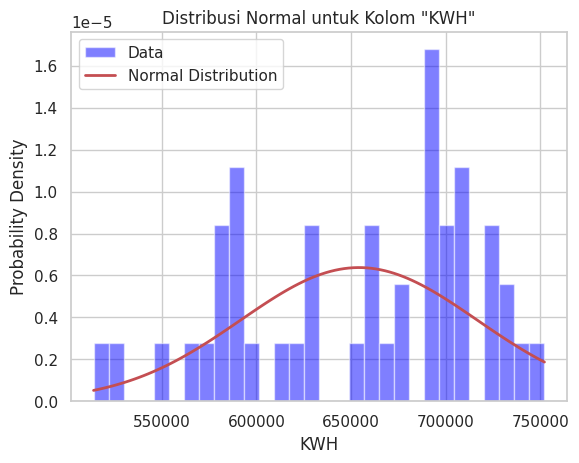

Mean: 654152.7257111111
Standard Deviation: 62568.73507928349


In [24]:
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

# Pilih kolom "KWH" dari DataFrame
kwh_data = data['KWH']

# Estimasi parameter distribusi normal (mean dan std) dari data
mean_param = kwh_data.mean()
std_param = kwh_data.std()

# Plot histogram dari data asli
plt.hist(kwh_data, bins=30, density=True, alpha=0.5, color='blue', label='Data')

# Plot PDF dari distribusi normal
x = np.linspace(kwh_data.min(), kwh_data.max(), 100)
pdf = norm.pdf(x, loc=mean_param, scale=std_param)
plt.plot(x, pdf, 'r-', lw=2, label='Normal Distribution')

plt.xlabel('KWH')
plt.ylabel('Probability Density')
plt.legend()
plt.title('Distribusi Normal untuk Kolom "KWH"')
plt.show()

# Print nilai estimasi parameter distribusi normal
print("Mean:", mean_param)
print("Standard Deviation:", std_param)

ChatGPT Prompt:

Berikan code untuk uji normalitas

In [10]:
from scipy.stats import shapiro

# Pilih kolom "KWH" dari DataFrame
kwh_data = data['KWH']

# Melakukan uji normalitas dengan uji Shapiro-Wilk
statistic, p_value = shapiro(kwh_data)

# Output hasil uji
print("Statistic:", statistic)
print("P-Value:", p_value)

# Melakukan interpretasi hasil uji
alpha = 0.05  # Tingkat signifikansi yang umum digunakan
if p_value > alpha:
    print("Data mengikuti distribusi normal (tidak dapat menolak H0)")
else:
    print("Data tidak mengikuti distribusi normal (menolak H0)")


Statistic: 0.9431154131889343
P-Value: 0.028027575463056564
Data tidak mengikuti distribusi normal (menolak H0)


## 3.3. Normal Probability Plot

ChatGPT Prompt:

Berikan kode python untuk mengkonstruksi normal probability plot untuk kolom "KWH" pada data dalam konteks modeling distributions dan berikan penjelasan untuk menginterpretasikan hasilnya

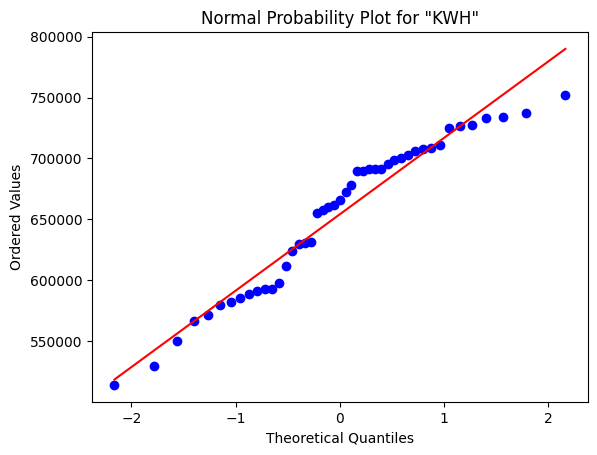

In [12]:
import scipy.stats as stats

# Pilih kolom "KWH" dari DataFrame
kwh_data = data['KWH']

# Membuat normal probability plot
stats.probplot(kwh_data, dist="norm", plot=plt)
plt.title('Normal Probability Plot for "KWH"')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()


# 4. PDF (Probability Density Function)

## 4.1. KDE dengan berbagai Fungsi Kernel berbeda

ChatGPT Prompt:

Berikan kode python untuk mengkonstruksi Kernel Density Estimaation dalam 1 grafik dengan berbagai fungsi kernel berbeda untuk kolom "KWH" pada data dalam konteks probability density function. Kemudian berikan penjelasan untuk menginterpretasikan hasilnya


<ipython-input-26-7f2a3a325e2f>:11: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(kwh_data, kernel='gau', label='Gaussian Kernel', shade=True)
<ipython-input-26-7f2a3a325e2f>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(kwh_data, kernel='gau', label='Gaussian Kernel', shade=True)
<ipython-input-26-7f2a3a325e2f>:12: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(kwh_data, kernel='cos', label='Cosine Kernel', shade=True)
<ipython-input-26-7f2a3a325e2f>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns

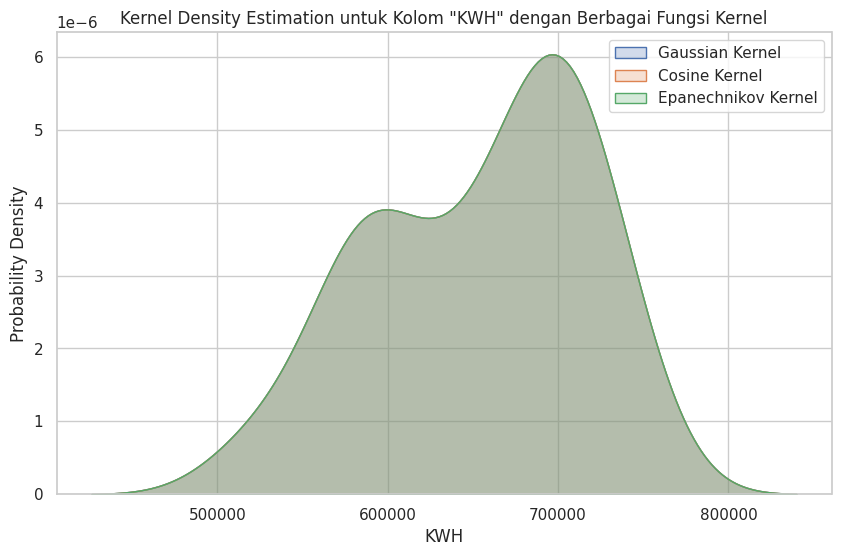

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Pilih kolom "KWH" dari DataFrame
kwh_data = data['KWH']

# Menggunakan Seaborn untuk membuat KDE plot dengan berbagai fungsi kernel
plt.figure(figsize=(10, 6))
sns.kdeplot(kwh_data, kernel='gau', label='Gaussian Kernel', shade=True)
sns.kdeplot(kwh_data, kernel='cos', label='Cosine Kernel', shade=True)
sns.kdeplot(kwh_data, kernel='epa', label='Epanechnikov Kernel', shade=True)

plt.xlabel('KWH')
plt.ylabel('Probability Density')
plt.legend()
plt.title('Kernel Density Estimation untuk Kolom "KWH" dengan Berbagai Fungsi Kernel')
plt.show()


## 4.2. KDE dengan berbagai Bandwidth berbeda

ChatGPT Prompt:

Berikan kode python untuk mengkonstruksi Kernel Density Estimaation dalam 1 grafik dengan berbagai bandwidth berbeda untuk kolom "KWH" pada data dalam konteks probability density function. Kemudian berikan penjelasan untuk menginterpretasikan hasilnya

<ipython-input-27-d65ccee3b23a>:6: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(kwh_data, bw=0.1, label='Bandwidth=0.1', shade=True)
<ipython-input-27-d65ccee3b23a>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(kwh_data, bw=0.1, label='Bandwidth=0.1', shade=True)
<ipython-input-27-d65ccee3b23a>:7: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(kwh_data, bw=0.5, label='Bandwidth=0.5', shade=True)
<ipython-input-27-d65ccee3b23a>:7: FutureWarning: 

`shade` is now deprecated 

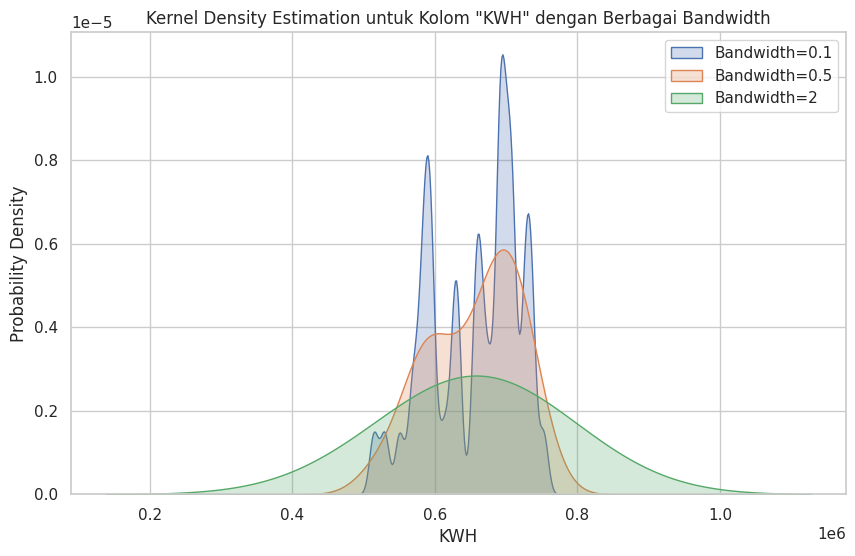

In [27]:

# Pilih kolom "KWH" dari DataFrame
kwh_data = data['KWH']

# Menggunakan Seaborn untuk membuat KDE plot dengan berbagai bandwidth
plt.figure(figsize=(10, 6))
sns.kdeplot(kwh_data, bw=0.1, label='Bandwidth=0.1', shade=True)
sns.kdeplot(kwh_data, bw=0.5, label='Bandwidth=0.5', shade=True)
sns.kdeplot(kwh_data, bw=2, label='Bandwidth=2', shade=True)

plt.xlabel('KWH')
plt.ylabel('Probability Density')
plt.legend()
plt.title('Kernel Density Estimation untuk Kolom "KWH" dengan Berbagai Bandwidth')
plt.show()


## 4.3. Implementasi Histogram

ChatGPT Prompt:

Berikan kode python untuk mengimplementasikan histogram untuk   probability density function pada  kolom "Produksi (Ton)" dalam data. Kemudian berikan penjelasan untuk menginterpretasikan hasilnya

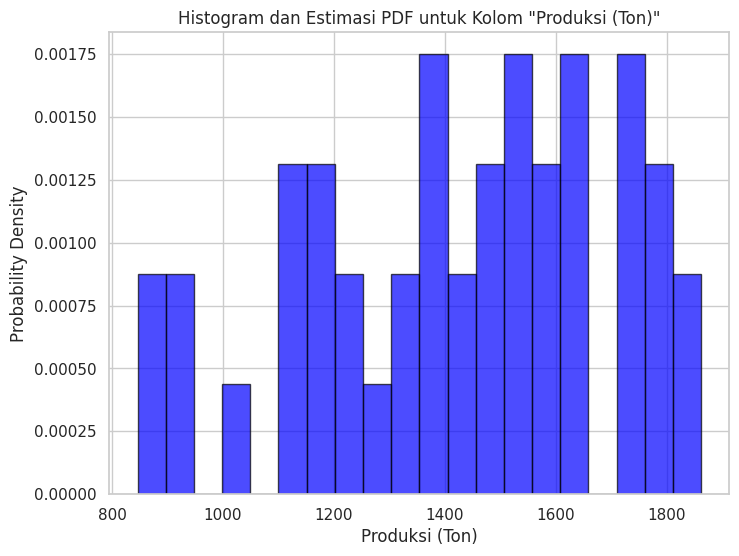

In [29]:
# Pilih kolom "Produksi (Ton)" dari DataFrame
produksi_data = data['Produksi (Ton)']

# Membuat histogram
plt.figure(figsize=(8, 6))
plt.hist(produksi_data, bins=20, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Produksi (Ton)')
plt.ylabel('Probability Density')
plt.title('Histogram dan Estimasi PDF untuk Kolom "Produksi (Ton)"')
plt.show()

## 4.4. Implementasi CDF

ChatGPT Prompt:

Berikan kode python untuk mengimplementasikan CDF untuk   probability density function pada  kolom "Produksi (Ton)" dalam data. Kemudian berikan penjelasan untuk menginterpretasikan hasilnya

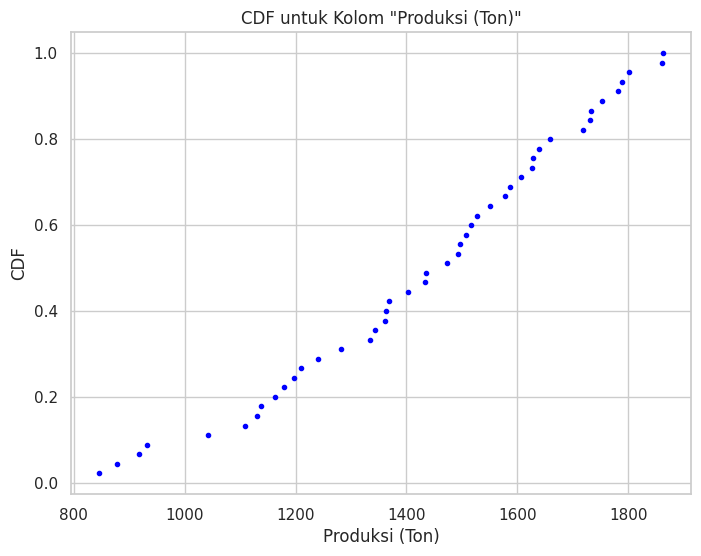

In [31]:
# Pilih kolom "Produksi (Ton)" dari DataFrame
produksi_data = data['Produksi (Ton)']

# Mengurutkan data
sorted_data = np.sort(produksi_data)

# Menghitung CDF
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Membuat plot CDF
plt.figure(figsize=(8, 6))
plt.plot(sorted_data, cdf, marker='.', linestyle='none', color='blue')
plt.xlabel('Produksi (Ton)')
plt.ylabel('CDF')
plt.title('CDF untuk Kolom "Produksi (Ton)"')
plt.grid(True)
plt.show()

## 4.5. Goodness of Fit Test

ChatGPT Prompt:

Berikan code python untuk menentukan distribusi yang cocok dengan kolom "KWH" pada data dengan menggunakan uji:

Kolmogorov-Smirnov test​

Anderson-Darling Test​

Shapiro-Wilk Test​

In [34]:
import pandas as pd
from scipy.stats import kstest, anderson, shapiro


# Pilih kolom "KWH" dari DataFrame
kwh_data = data['KWH']

# Uji Kolmogorov-Smirnov
ks_statistic, ks_p_value = kstest(kwh_data, 'norm')
print("Kolmogorov-Smirnov Test:")
print("KS Statistic:", ks_statistic)
print("KS p-value:", ks_p_value)

# Uji Anderson-Darling
ad_statistic, ad_critical_values, ad_significance_levels = anderson(kwh_data)
print("\nAnderson-Darling Test:")
print("AD Statistic:", ad_statistic)
print("Critical Values:", ad_critical_values)
print("Significance Levels:", ad_significance_levels)

# Uji Shapiro-Wilk
sw_statistic, sw_p_value = shapiro(kwh_data)
print("\nShapiro-Wilk Test:")
print("SW Statistic:", sw_statistic)
print("SW p-value:", sw_p_value)


Kolmogorov-Smirnov Test:
KS Statistic: 1.0
KS p-value: 0.0

Anderson-Darling Test:
AD Statistic: 0.9676466140580615
Critical Values: [0.535 0.609 0.731 0.853 1.014]
Significance Levels: [15.  10.   5.   2.5  1. ]

Shapiro-Wilk Test:
SW Statistic: 0.9431154131889343
SW p-value: 0.028027575463056564


## 4.6. Moment (Skewness, Kurtosis)

ChatGPT Prompt:

Berikan code untuk menghitung momen untuk kolom "KWH" dari data

In [35]:

# Pilih kolom "KWH" dari DataFrame
kwh_data = data['KWH']

# Menghitung momen pertama (mean)
mean = np.mean(kwh_data)

# Menghitung momen kedua (varians)
variance = np.var(kwh_data)

# Menghitung momen ketiga (skewness)
skewness = kwh_data.skew()

# Menghitung momen keempat (kurtosis)
kurtosis = kwh_data.kurtosis()

print("Momen Pertama (Mean):", mean)
print("Momen Kedua (Varians):", variance)
print("Momen Ketiga (Skewness):", skewness)
print("Momen Keempat (Kurtosis):", kurtosis)


Momen Pertama (Mean): 654152.7257111111
Momen Kedua (Varians): 3827850018.101081
Momen Ketiga (Skewness): -0.4468263590497963
Momen Keempat (Kurtosis): -0.875924618945418
